In [2]:
from src.create_data_list import create_data_list
import pandas as pd
from src.import_data import *

urls = create_data_list("sources.yml")

airports = import_aiport_data(urls["airports"].values())
compagnies = import_compagnies_data(urls["compagnies"].values())
liaisons = import_liaisons_data(urls["liaisons"].values())


In [12]:
import geopandas as gpd

airports_location = gpd.read_file(urls['geojson']['airport'])



In [30]:
import folium 

map = folium.Map()


tooltip = folium.GeoJsonTooltip(
    fields=["Nom"],
    localize=True,
    labels=True,
)
folium.GeoJson(airports_location, tooltip=tooltip).add_to(map)

map

In [23]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
from plotnine import ggplot, geom_line, aes

import src.import_data as sid
from src.create_data_list import create_data_list

# Load data ----------------------------------
urls = create_data_list("./sources.yml")


pax_apt_all = sid.import_airport_data(urls['airports'].values())
pax_cie_all = sid.import_airport_data(urls['compagnies'].values())
pax_lsn_all = sid.import_airport_data(urls['liaisons'].values())


airports_location = gpd.read_file(
    urls['geojson']['airport']
)


liste_aeroports = pax_apt_all['apt'].unique()
default_airport = liste_aeroports[0]

In [28]:
pax_apt_all

,anmois,apt,apt_nom,apt_zon,apt_peq,apt_pax_dep,apt_pax_arr,apt_pax_tr,apt_frp_dep,apt_frp_arr,apt_nmvt_mxt,apt_nmvt_cgo,an,mois
0,201801,FMCZ,MAYOTTE-MARCEL HENRY,OM,35209,13108,18977,1202,"21,8","170,4",546,1,2018,1
1,201801,FMEE,LA REUNION-ROLAND GARROS,OM,269383,112430,127167,4768,743,"1758,7",1149,16,2018,1
2,201801,FMEP,ST-PIERRE-PIERREFONDS,OM,13219,6034,7181,0,0,"0,4",208,0,2018,1
3,201801,LFAQ,ALBERT-BRAY,MT,2108,119,124,0,108,"78,5",32,15,2018,1
4,201801,LFBA,AGEN-LA GARENNE,MT,2513,1335,1178,0,0,0,131,0,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,202212,TFFG,ST-MARTIN-GRAND-CASE,OM,18700,8738,9563,0,"14,7","25,2",619,19,2022,12
986,202212,TFFJ,ST-BARTHELEMY,OM,22975,10809,11673,3,"7,8","41,2",4256,126,2022,12
987,202212,TFFR,POINTE-A-PITRE-LE RAIZET,OM,224367,98600,108384,5648,"151,7","1021,9",2212,92,2022,12
988,202212,ZZMT,AUTRES APT (MT),MT,4085,1908,2042,27,3,"7,8",1232,5,2022,12


In [30]:
filtered = pax_apt_all.set_index('apt').filter(like='FMCZ', axis=0)
filtered

,anmois,apt_nom,apt_zon,apt_peq,apt_pax_dep,apt_pax_arr,apt_pax_tr,apt_frp_dep,apt_frp_arr,apt_nmvt_mxt,apt_nmvt_cgo,an,mois
apt,,,,,,,,,,,,,
FMCZ,201801,MAYOTTE-MARCEL HENRY,OM,35209,13108,18977,1202,"21,8","170,4",546,1,2018,1
FMCZ,201802,MAYOTTE-MARCEL HENRY,OM,26844,14135,9642,937,31,182,382,0,2018,2
FMCZ,201803,MAYOTTE-MARCEL HENRY,OM,29207,12863,13169,929,"25,3","199,4",413,1,2018,3
FMCZ,201804,MAYOTTE-MARCEL HENRY,OM,28441,12778,11870,1576,"49,1","172,6",381,0,2018,4
FMCZ,201805,MAYOTTE-MARCEL HENRY,OM,32873,14675,14185,1572,"39,1",205,442,0,2018,5
FMCZ,201806,MAYOTTE-MARCEL HENRY,OM,34280,14894,14441,2260,"39,6","228,9",461,1,2018,6
FMCZ,201807,MAYOTTE-MARCEL HENRY,OM,52020,25564,21634,2291,"37,7","215,5",693,0,2018,7
FMCZ,201808,MAYOTTE-MARCEL HENRY,OM,54753,24952,24041,2687,"44,9","262,4",707,0,2018,8
FMCZ,201809,MAYOTTE-MARCEL HENRY,OM,31887,17219,10768,1498,"28,5","211,8",381,1,2018,9


In [34]:
pax_apt_all["traffic"] = pax_apt_all["apt_pax_dep"]+pax_apt_all["apt_pax_tr"]+pax_apt_all["apt_pax_arr"]
pax_apt_default_airport = pax_apt_all.set_index('apt').filter(like=default_airport, axis=0)
pax_apt_default_airport["date"] = pd.to_datetime(pax_apt_default_airport["an"]+"/"+ pax_apt_default_airport["mois"])
pax_apt_default_airport

/tmp/ipykernel_16676/2550358766.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


,anmois,apt_nom,apt_zon,apt_peq,apt_pax_dep,apt_pax_arr,apt_pax_tr,apt_frp_dep,apt_frp_arr,apt_nmvt_mxt,apt_nmvt_cgo,an,mois,traffic,date
apt,,,,,,,,,,,,,,,
FMCZ,201801,MAYOTTE-MARCEL HENRY,OM,35209,13108,18977,1202,"21,8","170,4",546,1,2018,1,33287,2018-01-01
FMCZ,201802,MAYOTTE-MARCEL HENRY,OM,26844,14135,9642,937,31,182,382,0,2018,2,24714,2018-02-01
FMCZ,201803,MAYOTTE-MARCEL HENRY,OM,29207,12863,13169,929,"25,3","199,4",413,1,2018,3,26961,2018-03-01
FMCZ,201804,MAYOTTE-MARCEL HENRY,OM,28441,12778,11870,1576,"49,1","172,6",381,0,2018,4,26224,2018-04-01
FMCZ,201805,MAYOTTE-MARCEL HENRY,OM,32873,14675,14185,1572,"39,1",205,442,0,2018,5,30432,2018-05-01
FMCZ,201806,MAYOTTE-MARCEL HENRY,OM,34280,14894,14441,2260,"39,6","228,9",461,1,2018,6,31595,2018-06-01
FMCZ,201807,MAYOTTE-MARCEL HENRY,OM,52020,25564,21634,2291,"37,7","215,5",693,0,2018,7,49489,2018-07-01
FMCZ,201808,MAYOTTE-MARCEL HENRY,OM,54753,24952,24041,2687,"44,9","262,4",707,0,2018,8,51680,2018-08-01
FMCZ,201809,MAYOTTE-MARCEL HENRY,OM,31887,17219,10768,1498,"28,5","211,8",381,1,2018,9,29485,2018-09-01


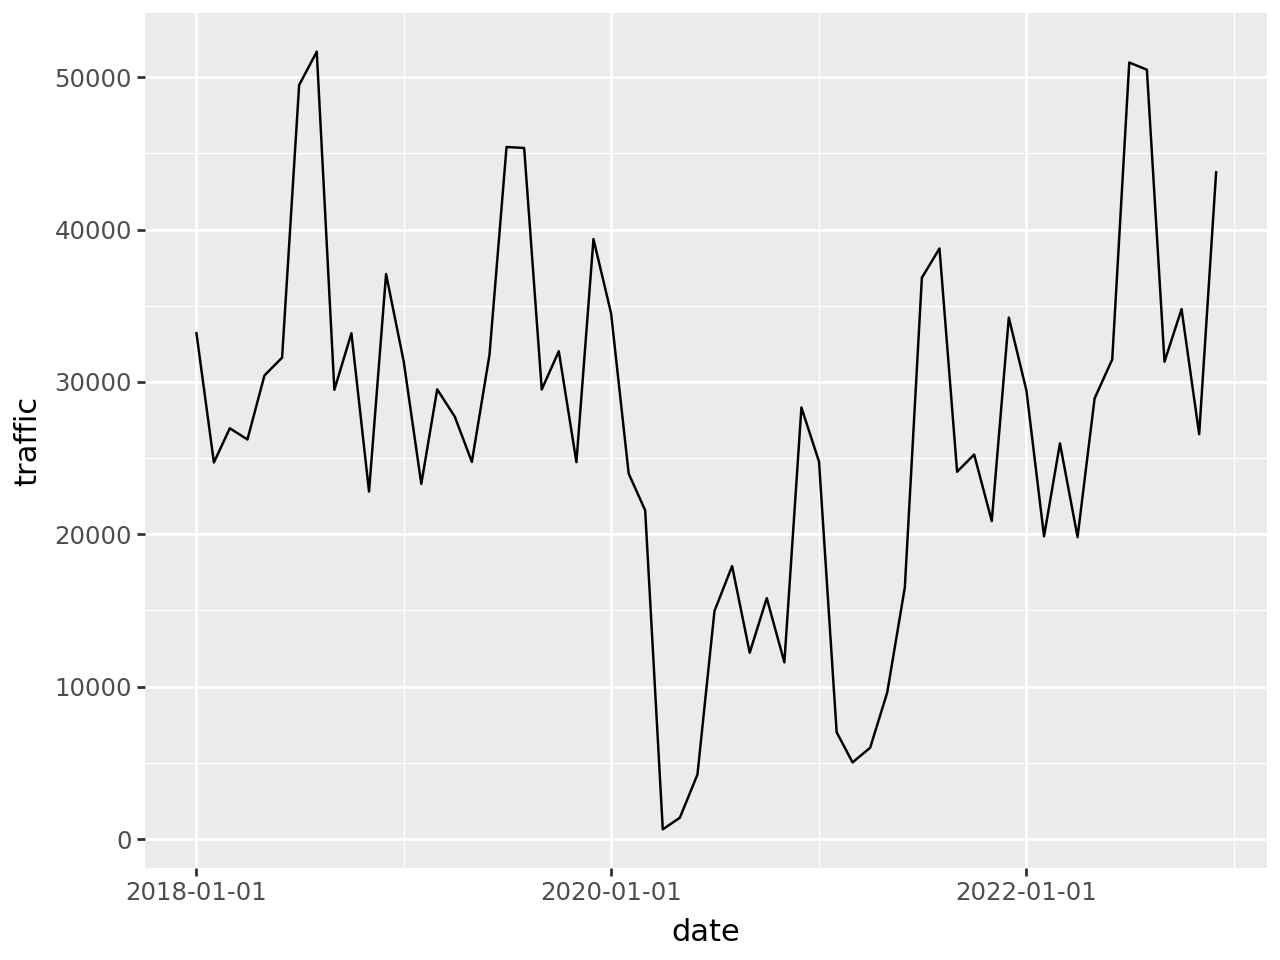

In [40]:
from plotnine import ggplot, geom_line, aes
#"c'est parfait, c'est grandiose" signé Armelle K 🥸
(
    ggplot(pax_apt_default_airport, aes("date", "traffic"))
    + geom_line()
)

In [53]:
pax_apt_all

,anmois,apt,apt_nom,apt_zon,apt_peq,apt_pax_dep,apt_pax_arr,apt_pax_tr,apt_frp_dep,apt_frp_arr,apt_nmvt_mxt,apt_nmvt_cgo,an,mois,traffic
0,201801,FMCZ,MAYOTTE-MARCEL HENRY,OM,35209,13108,18977,1202,"21,8","170,4",546,1,2018,1,33287
1,201801,FMEE,LA REUNION-ROLAND GARROS,OM,269383,112430,127167,4768,743,"1758,7",1149,16,2018,1,244365
2,201801,FMEP,ST-PIERRE-PIERREFONDS,OM,13219,6034,7181,0,0,"0,4",208,0,2018,1,13215
3,201801,LFAQ,ALBERT-BRAY,MT,2108,119,124,0,108,"78,5",32,15,2018,1,243
4,201801,LFBA,AGEN-LA GARENNE,MT,2513,1335,1178,0,0,0,131,0,2018,1,2513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,202212,TFFG,ST-MARTIN-GRAND-CASE,OM,18700,8738,9563,0,"14,7","25,2",619,19,2022,12,18301
986,202212,TFFJ,ST-BARTHELEMY,OM,22975,10809,11673,3,"7,8","41,2",4256,126,2022,12,22485
987,202212,TFFR,POINTE-A-PITRE-LE RAIZET,OM,224367,98600,108384,5648,"151,7","1021,9",2212,92,2022,12,212632
988,202212,ZZMT,AUTRES APT (MT),MT,4085,1908,2042,27,3,"7,8",1232,5,2022,12,3977


In [64]:
from src.figures import plot_airport_line 

plot_airport_line(pax_apt_all, "FMEE")

In [90]:
def create_data_from_input(dataframe, year, month):
    return dataframe[(dataframe["an"]==year) & (dataframe["mois"]==month)]

create_data_from_input(pax_apt_all, "2019", "1")

,anmois,apt,apt_nom,apt_zon,apt_peq,apt_pax_dep,apt_pax_arr,apt_pax_tr,apt_frp_dep,apt_frp_arr,apt_nmvt_mxt,apt_nmvt_cgo,an,mois,traffic
0,201901,FMCZ,MAYOTTE-MARCEL HENRY,OM,33406,12577,18403,376,"24,8","180,2",398,0,2019,1,31356
1,201901,FMEE,LA REUNION-ROLAND GARROS,OM,263652,108351,125068,3810,"872,6","1769,7",1148,19,2019,1,237229
2,201901,FMEP,ST-PIERRE-PIERREFONDS,OM,11370,4985,6380,0,0,"0,5",180,0,2019,1,11365
3,201901,LFAQ,ALBERT-BRAY,MT,1709,128,122,0,"81,3","64,6",68,13,2019,1,250
4,201901,LFBA,AGEN-LA GARENNE,MT,1275,706,569,0,0,0,96,0,2019,1,1275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,201901,TFFG,ST-MARTIN-GRAND-CASE,OM,15685,7589,7738,6,"18,5","16,7",607,67,2019,1,15333
85,201901,TFFJ,ST-BARTHELEMY,OM,20091,10986,8814,0,10,"19,1",3631,126,2019,1,19800
86,201901,TFFR,POINTE-A-PITRE-LE RAIZET,OM,262523,117729,129310,5389,"213,6","795,9",2469,57,2019,1,252428
87,201901,ZZMT,AUTRES APT (MT),MT,6306,3099,2946,29,"13,6","9,6",1505,10,2019,1,6074


In [78]:
pax_apt_all

,anmois,apt,apt_nom,apt_zon,apt_peq,apt_pax_dep,apt_pax_arr,apt_pax_tr,apt_frp_dep,apt_frp_arr,apt_nmvt_mxt,apt_nmvt_cgo,an,mois,traffic
0,201801,FMCZ,MAYOTTE-MARCEL HENRY,OM,35209,13108,18977,1202,"21,8","170,4",546,1,2018,1,33287
1,201801,FMEE,LA REUNION-ROLAND GARROS,OM,269383,112430,127167,4768,743,"1758,7",1149,16,2018,1,244365
2,201801,FMEP,ST-PIERRE-PIERREFONDS,OM,13219,6034,7181,0,0,"0,4",208,0,2018,1,13215
3,201801,LFAQ,ALBERT-BRAY,MT,2108,119,124,0,108,"78,5",32,15,2018,1,243
4,201801,LFBA,AGEN-LA GARENNE,MT,2513,1335,1178,0,0,0,131,0,2018,1,2513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,202212,TFFG,ST-MARTIN-GRAND-CASE,OM,18700,8738,9563,0,"14,7","25,2",619,19,2022,12,18301
986,202212,TFFJ,ST-BARTHELEMY,OM,22975,10809,11673,3,"7,8","41,2",4256,126,2022,12,22485
987,202212,TFFR,POINTE-A-PITRE-LE RAIZET,OM,224367,98600,108384,5648,"151,7","1021,9",2212,92,2022,12,212632
988,202212,ZZMT,AUTRES APT (MT),MT,4085,1908,2042,27,3,"7,8",1232,5,2022,12,3977


In [89]:
def summary_stat_airport(dataframe):
    return dataframe[["apt","traffic", "apt_pax_dep", "apt_pax_arr", "apt_pax_tr"]].groupby("apt").sum().sort_values("traffic", ascending=False).reset_index()

summary_stat_airport(pax_apt_all)

,apt,traffic,apt_pax_dep,apt_pax_arr,apt_pax_tr
0,LFPG,254319727,126573437,127653783,92507
1,LFPO,120663414,60226750,60428023,8641
2,LFMN,51569241,25812824,25693791,62626
3,LFLL,39378776,19611810,19630123,136843
4,LFML,36701712,18213911,18300687,187114
...,...,...,...,...,...
101,NTGJ,3332,1495,1789,48
102,NTGI,2323,939,769,615
103,NTHE,2149,668,851,630
104,NWWD,2132,1062,1070,0
